### Introduction To Perceptrons

Flo Martinez Addiego (fam53@georgetown.edu)

NSCI-6006-01 Computational Neuroscience

Class taught by Dr. Maximilian Riesenhuber

Georgetown University

### Background Information

From Max's second lecture, he talks about how if we want to describe the brain as a computer, then we should be able to understand what a single neuron can do by itself and then as a group.

We know from the first lecture (and the reminder from the second lecture!) that biologically a neuron will take in a bunch of inputs and, based on different spatial and temporal properties of these inputs, will sum the inputs together.

If the sum is greater than some value (the threshold!), it triggers an action potential and produces an output! If not, it doesn't.


<img src='https://www.moleculardevices.com/applications/patch-clamp-electrophysiology/media_1c6efa9f5f7a50e4dab68c492527445b7fdabda54.jpeg?width=750&format=jpeg&optimize=medium'></img>


The operation that is happening for the neuron to fire (spike) or not is inherently non-linear because it is dependent on a threshold.

This is all well and good, but how might we represent this computationally? Enter Rosenblatt's Perceptron (1958):

<img src='https://www.oreilly.com/api/v2/epubs/9781788990547/files/assets/36bb334b-4393-4c4c-82a8-ecac23d4ac70.png'></img>

The idea being shown in this image is that we have a series of inputs (I_1 to I_N) that are each going to be multiplied by their own weights (W_1 to W_N). This will give us N individual values which are then summed together. If this sum surpasses a threshold, then we will see the output y.


Mathematically, this may be represented as:
\begin{align}
        \sum_{i=1}^n x_i w_i
    \end{align}

(dot product of the weights and the corresponding input)

### Rosenblatt's Perceptron (1958): What does it really DO?

The perceptron will solve any linearly separable problem by dividing the representational space into two fields - one that leads to a classification class of 1 and the other that leads to a classification class of 0, for example. It does this by finding a hyperplane in n-dimensional space.

The perceptron was revolutionary because it was able to actually "learn" -- given the labels for a series of training images, a perceptron would aim to figure out the generalizable hyperplane that would allow it to solve this problem for unknown data such that it would produce the correct output (identify the correct class).

### How does it do this?

The perceptron will use an algorithm to modify its weights, ultimately hopefully learning the correct ones.

Let's again show this mathematically -

\begin{align}
        w_{ji} = w_{ji} + \eta(y_j -ypred_j)*ypred_i
    \end{align}

In this case, we are showing that the weights are being updated after an attempt using both a learning rate (defines how much of a change to make) and the difference between the actual value and the predicted value.

As we learn, we want to be able to decrease the training set error.

### Now, let's go ahead and simulate this with some code...

In [4]:
import numpy as np

Let's first generate a series of inputs and weights (assume that we have three inputs and they will each have their own weight)

In [7]:
inputs = np.array([0.1, 0.5, 0.2])
weights = np.array([0.4, 0.3, 0.6])

Now, we need to take the dot product of each of these weights, following the equation:

\begin{align}
        \sum_{i=1}^n x_i w_i
    \end{align}


** note that this is just the sum of the individual products...I will show it both ways to convince you :)

In [22]:
# in this cell, I am creating an empty list to store the mutliplicative values. Then I will iterate through all the numbers in inputs and multiply the input with its corresponding weight
# in the end, I will sum all the values and this will be the weighted sum
store_vals = []
for val in np.arange(len(inputs)):
  hold = inputs[val]*weights[val]
  store_vals.append(hold)

np.sum(store_vals)

0.31

In [23]:
#Thankfully, we don't always have to do this! We can use the built-in function from numpy (np.dot) and it will do the exact same thing...compare the outputs for yourselves :)
dot_prod_output = np.dot(inputs,weights)
print(dot_prod_output)

0.31


Great! Now we need to decide what our threshold is...
Following the logic from the Rosenblatt perceptron, let's create a step function.

In this function if the value is less than the threshold, we will get no output (zero). Else, if the value is greater than the threshold, we will get an output (one)

In [24]:
chosen_threshold = 1

To build some intuition for what this might look like, let's go ahead and plot the function below:

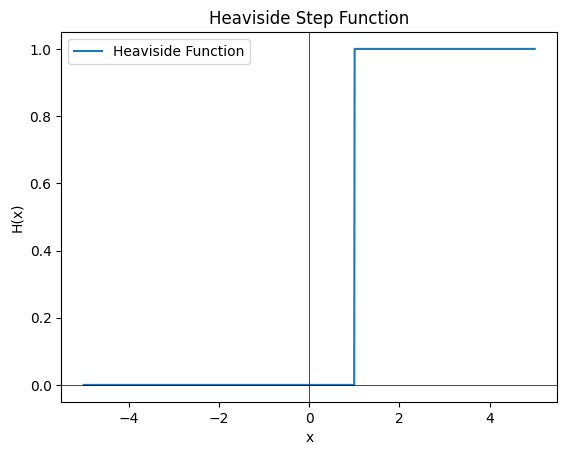

In [36]:
import matplotlib.pyplot as plt
# Define the Heaviside function
def heaviside(x):
    return np.heaviside(x-chosen_threshold, 1)

# Generate values for x
x = np.linspace(-5, 5, 1000)
y = heaviside(x)

# Create the plot
plt.plot(x, y, label="Heaviside Function")
plt.title("Heaviside Step Function")
plt.xlabel("x")
plt.ylabel("H(x)")
plt.grid(False)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

In [25]:
def activation_function(dot_product):
  if dot_product > chosen_threshold:
    return 1
  else:
    return 0

In [27]:
# let's now go ahead and put this all together

def perceptron(x_input,w_weight):
  dot_product_output = np.dot(x_input,w_weight)
  fire = activation_function(dot_product_output)
  return fire


In [29]:
output = perceptron(inputs,weights)
if output == 0:
  print("Our perceptron didn't fire!")
else:
  print("Our perceptron fired!")

Our perceptron didn't fire!


You'll probably remember from your lecture with Max (and what I hopefully was able to remind you of above), that one big benefit to perceptron's is that they learn, so they are able to update their weights to get a more accurate prediction.

Since this is a new tutorial, I haven't coded that example up yet, but let me know if you think that would be helpful!